### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [1]:
# write you code here
import seaborn as sns 
import pandas as pd
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import HuberRegressor, RANSACRegressor

import warnings



In [2]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [3]:
# write you code here
insta_df = pd.read_csv('Instagram_Data.csv', nrows = 2000)


##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [4]:
# 10 first rows of the data
print(insta_df.head(10))

   User uuid  Likes  Days passed from post  Likes Score    Type  \
0          1    506                    657         0.74   Image   
1          1    385                    657         0.57   Image   
2          1    373                    666         0.55  Images   
3          1    312                    667         0.46  Images   
4          1    513                    674         0.75  Images   
5          1    539                    677         0.79  Images   
6          1    330                    677         0.49   Image   
7          1    472                    681         0.69  Images   
8          1    272                    682         0.40   Image   
9          1    304                    688         0.45  Images   

   Numer of Tags  Numer of Comments          Date Posted  Year  Month  Day  \
0              3                 11  2019-05-12 21:18:39  2019      5   12   
1              0                  1  2019-05-12 14:25:55  2019      5   12   
2              4            

In [5]:
# insta_df shape
insta_df.shape

(2000, 13)

In [6]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [7]:
# insta_df row numbers:
len(insta_df)

2000

    5- Check the data type of each column ( 1 point)

In [8]:
# Print datatypes
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

In [9]:
insta_df.columns[1]

'Likes'

In [10]:
ins = insta_df.copy()

In [11]:
ins.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

In [12]:
ins2 = ins.drop(ins.iloc[:, 7:],axis = 1)

In [13]:
ins2

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments
0,1,506,657,0.74,Image,3,11
1,1,385,657,0.57,Image,0,1
2,1,373,666,0.55,Images,4,15
3,1,312,667,0.46,Images,4,1
4,1,513,674,0.75,Images,5,0
...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84
1996,17,81,193,0.06,Video,4,5
1997,17,251,194,0.19,Image,4,13
1998,17,962,197,0.72,Images,0,38


    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [14]:
# Remove User uuid
insta_df = insta_df.drop('User uuid', axis=1)

# Remove User Likes Score
insta_df = insta_df.drop('Likes Score', axis=1)

# Remove all columns between column index 1 to 3
insta_df = insta_df.drop(insta_df.iloc[:, 5: ],axis = 1)

# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [15]:
# write you code here
insta_df['Type'].unique()

array(['Image', 'Images', 'Video'], dtype=object)

##### Observation
3 unique values in Type column

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [16]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder
insta_df.Type= LabelEncoder().fit_transform(insta_df.Type)

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [17]:
# a. How many NaNs as total
insta_df.isnull().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

##### Observation
No null values in any column

In [18]:
# b. How many NaNs as a percentage of overall data
insta_df.isnull().sum() / len(insta_df)*100

Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
dtype: float64

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [19]:
# your featuers X:
X = insta_df.loc[:, insta_df.columns != 'Likes']
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [20]:
# your target y:
y = insta_df.loc[:, 'Likes']


##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

<Axes: >

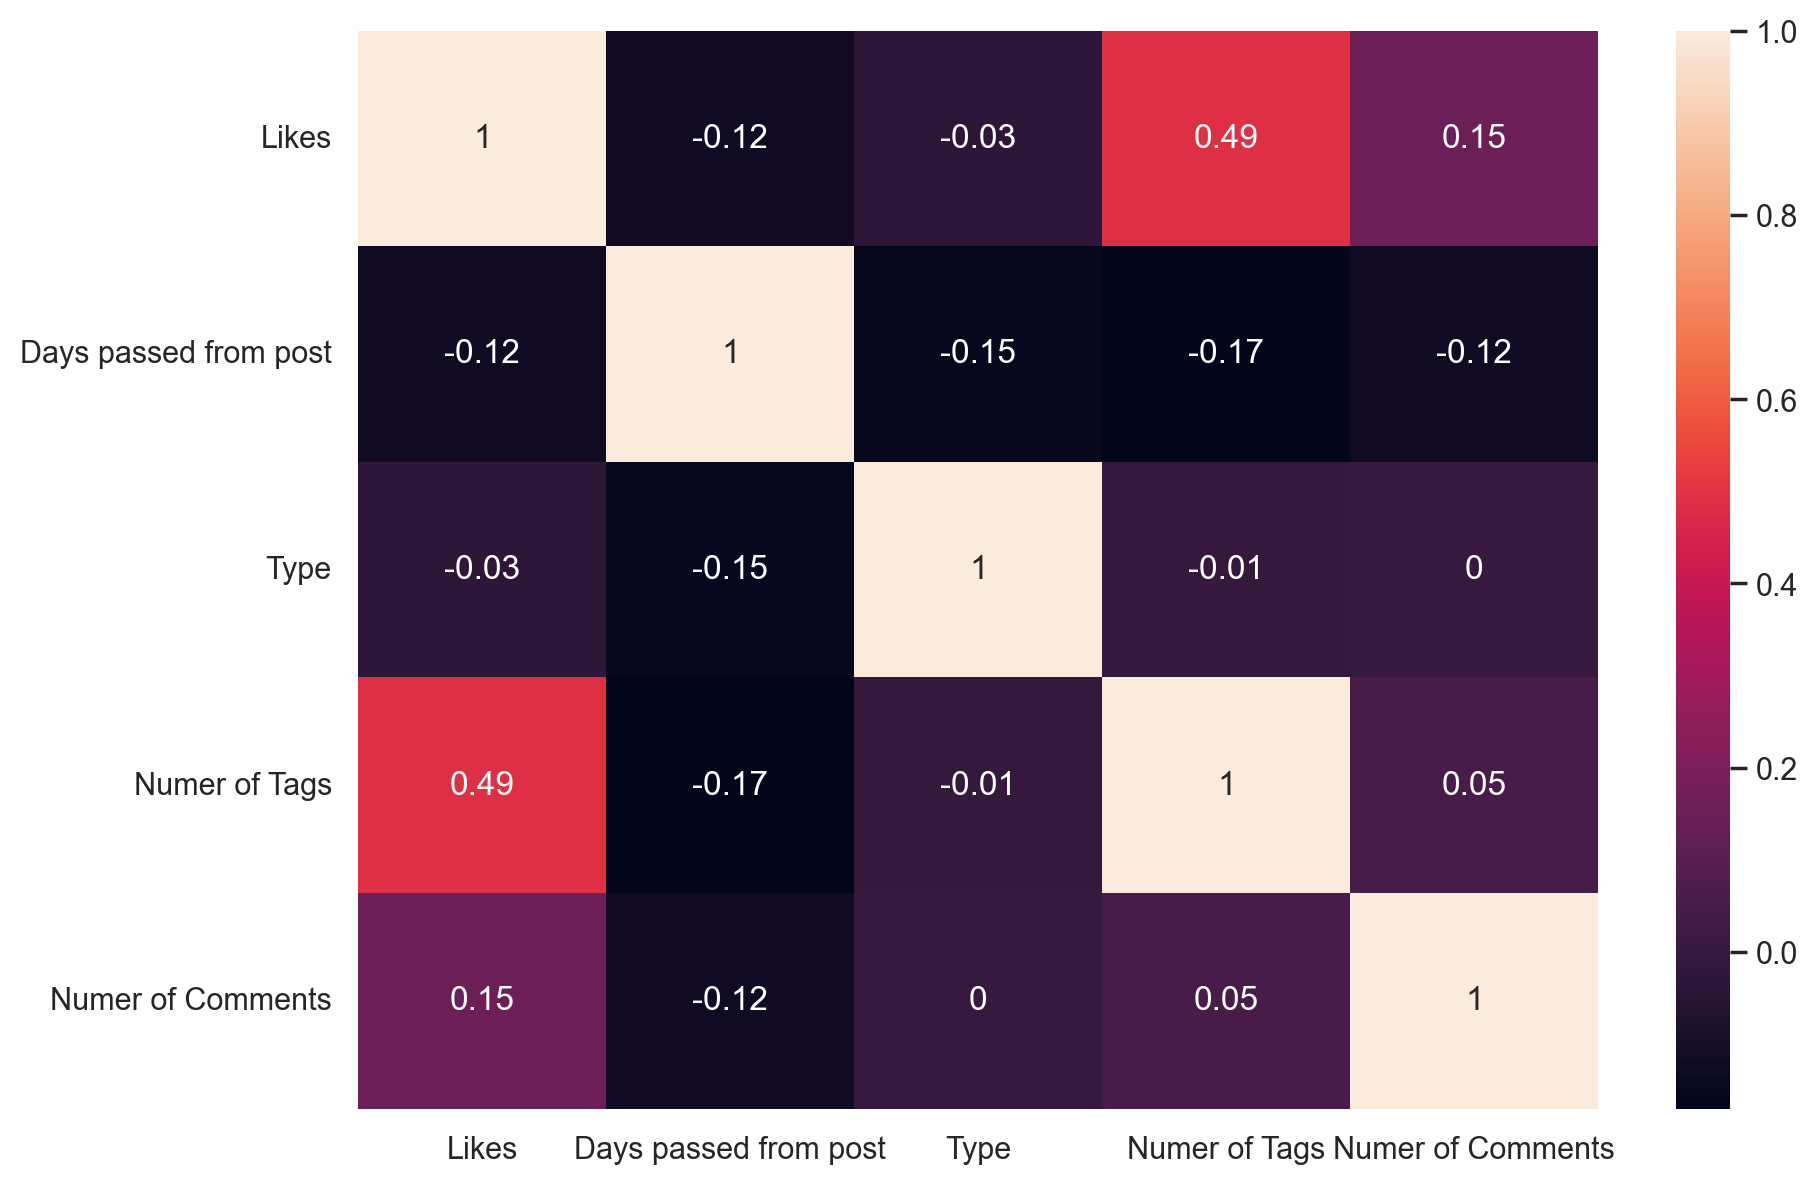

In [21]:
# write your code here:
corr = insta_df.corr().round(2)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(data=corr, annot=True)


    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:
##### Observation:
1. There is strong positive correlation between X- Number of tags & Y- Likes of 0.49
2. There is negative correlation -0.12 in features of X- Days passed from post & number of comments, means the number of comments also tends 
to decrease as time passes.
3. negative correlation -0.17 number of tags & Days passed from post, this due to older posts to have fewer tags


    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

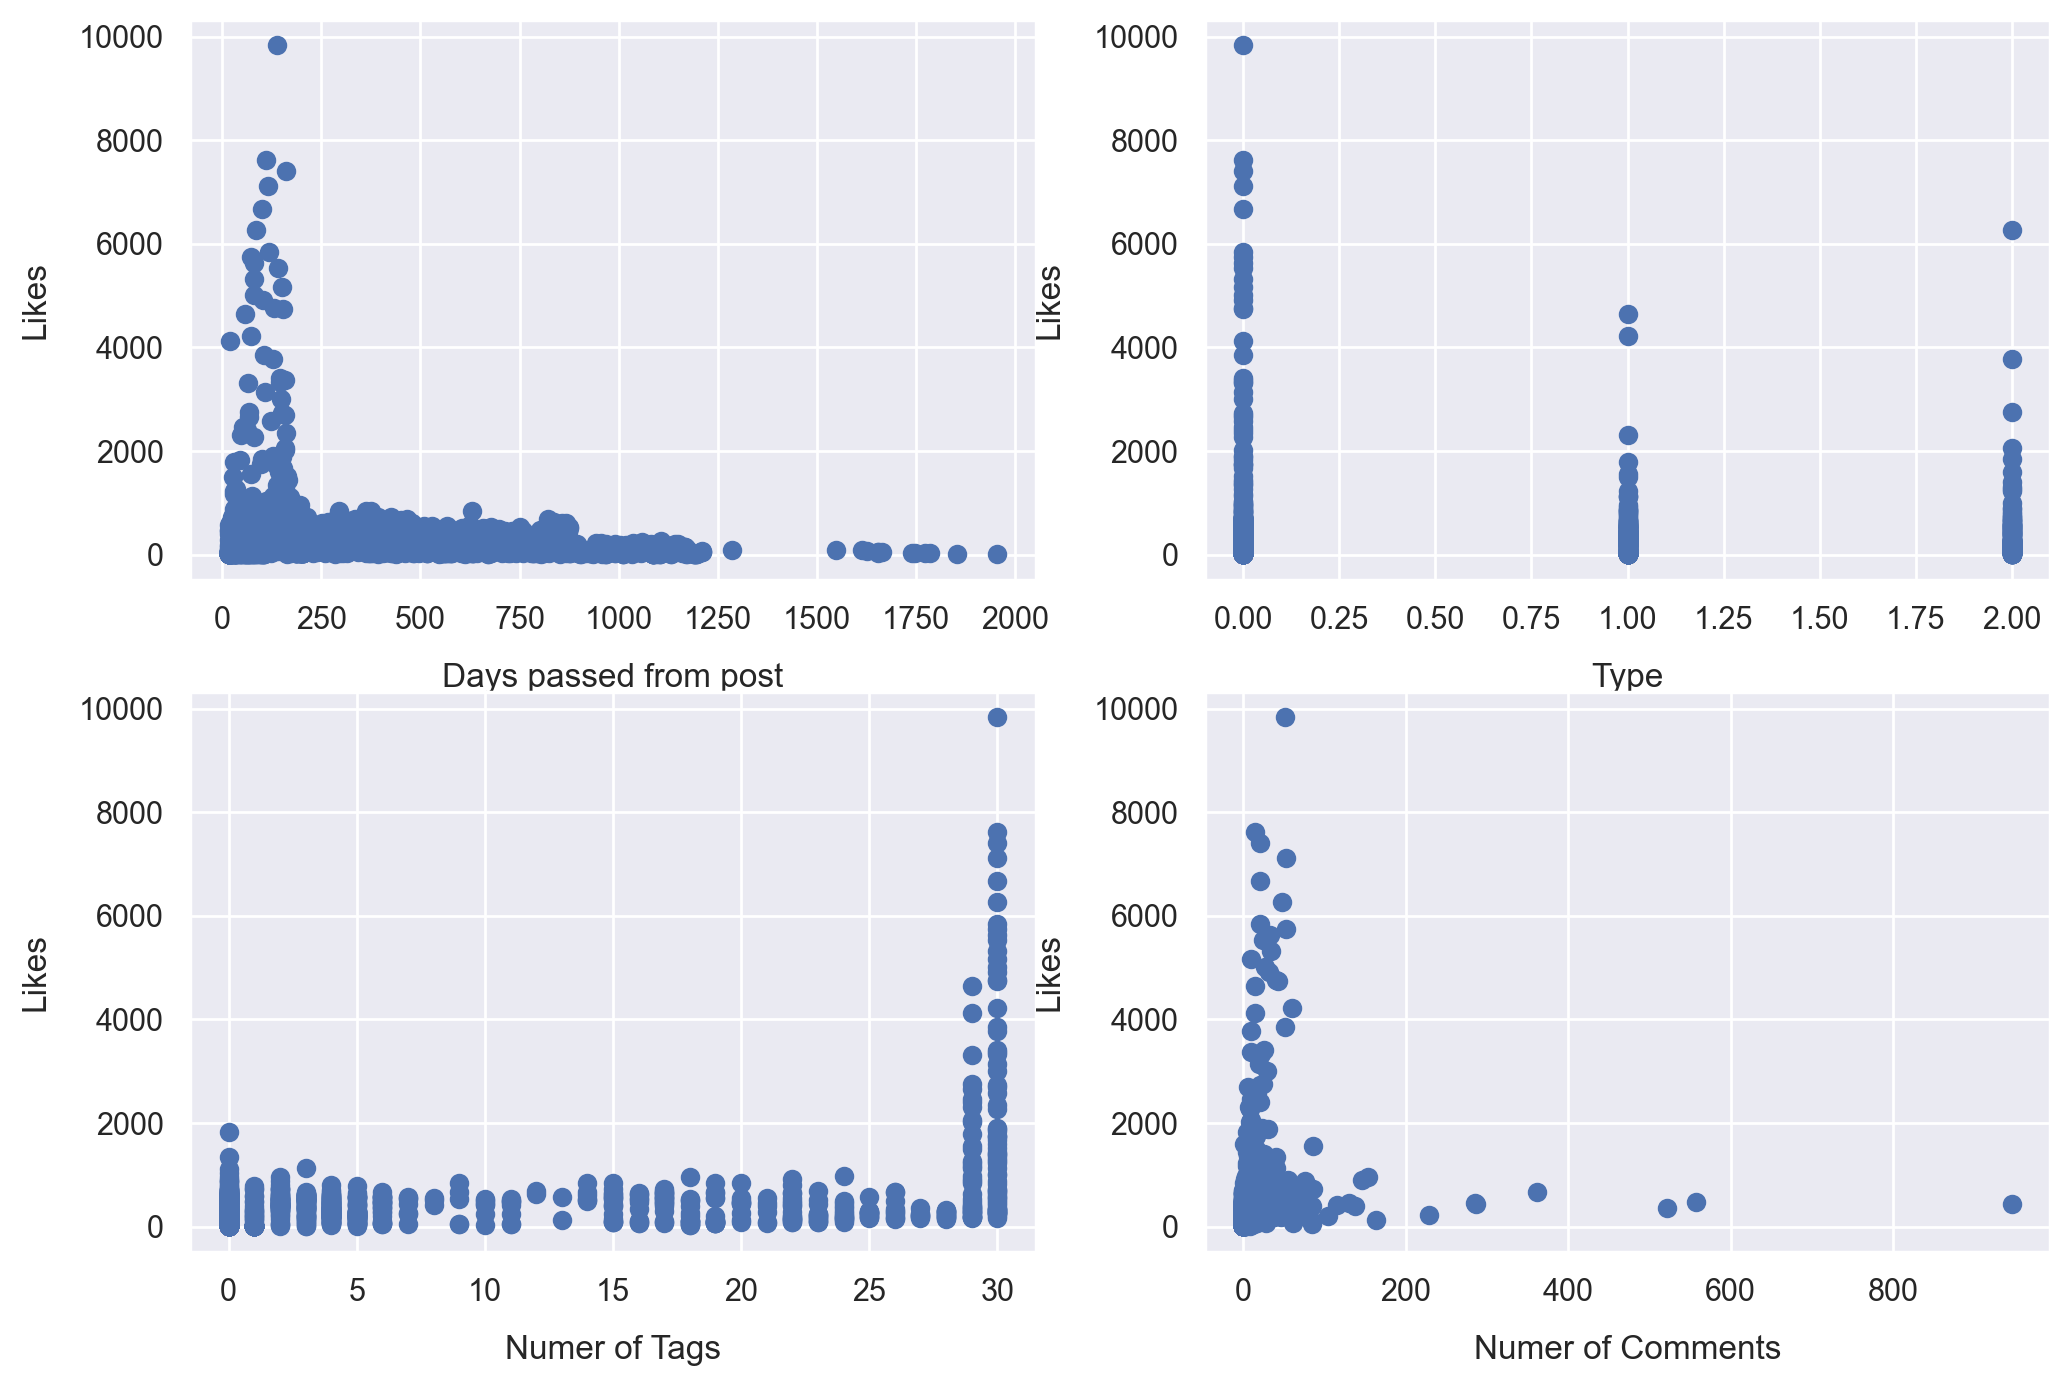

In [22]:
# write your code here
# Pair plot
plt.figure(figsize = ( 12 , 8 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(2 , 2 ,i +1 ) 
    x = insta_df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'Likes' )

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:
##### Observation:
1. There's a clear negative correlation between Likes & Days passed from post. The number of likes tends to decrease as the number of days passed since the post increases.
2. Since the Type variable is categorical , so plot doesn't give a clear trend or pattern.First category '0'(Image) having higher counts.
3. Likes Vs Number of tags: not extremely strong correlation but there is a slight tendency for posts with more tags to receive more likes.
4. Likes Vs Number of comments: positive good correlation , Posts with more comments tend to have more likes. There is a upward trend in the beginning can be noticed with increase in comments, likes tends to increase. 

    15- Display the target distribution using histogram (1 points)

Text(0.5, 0, 'Likes')

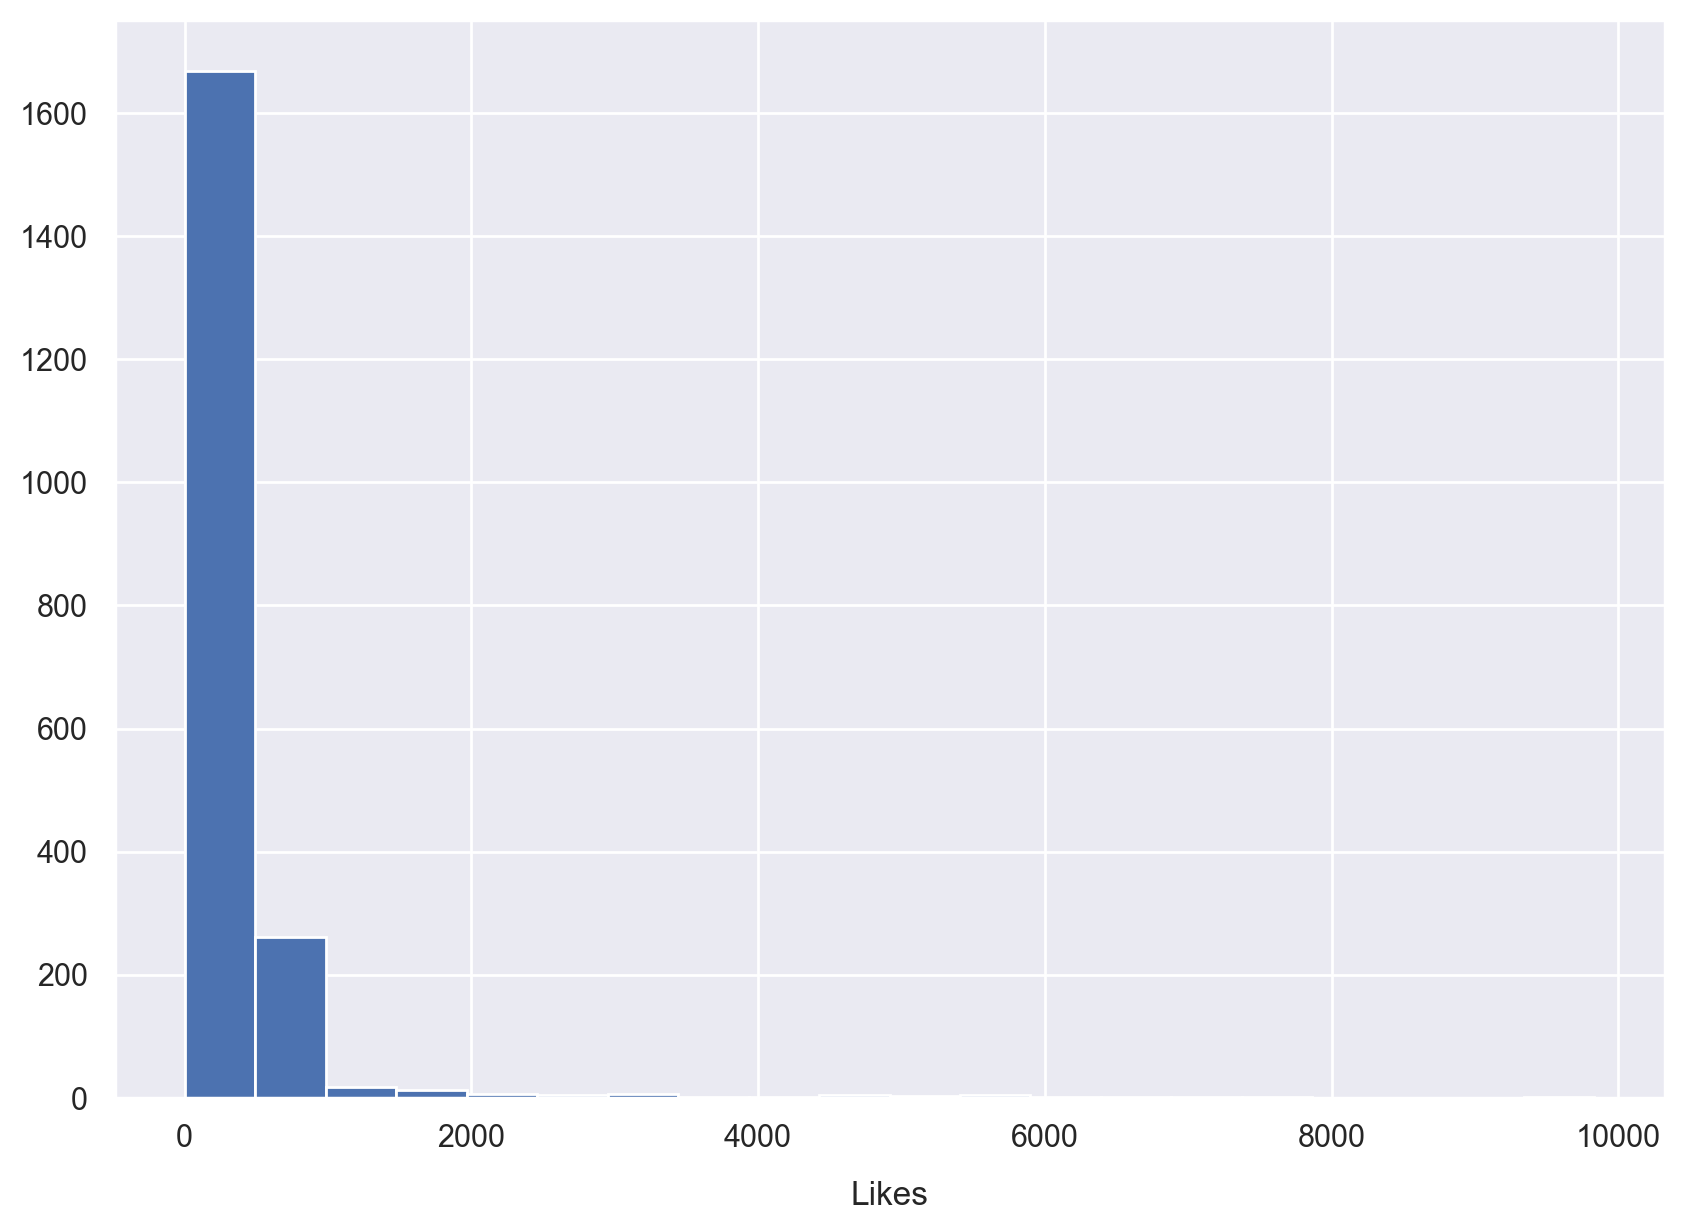

In [23]:
# write your code here:
fig = plt.figure()
num_bins = min((20, len(insta_df['Likes'].unique())))
insta_df['Likes'].hist(bins=num_bins)
plt.xlabel('Likes')


    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:
##### Observation:
1. Likes-> Highly skewed to the right (positive skew), this could be most posts receive a relatively small number of likes, while a few posts receive a very large number of likes 
2. Days passed from past -> Possibly slightly skewed to the right, but more uniformly distributed than Likes variable.
3. Type is a categorical variable so distribution of 3 types are displayed.
4. Number of tags -> Highly skewed to the right (positive skew) same as Likes most posts have a small number of tags, and a few posts have a large number of tags.
5. Number of comments -> Same as others highly skewed to the right (positive skew), seems like Likes and Comments are often correlated, few posts recieve less comments and few can have more.


--

    17-Transfer the target y into log to have the normal distributions: (1 point)

In [24]:
#transfer the target y into log
insta_df['Likes'] = np.log(insta_df['Likes'])

Text(0.5, 0, 'Likes')

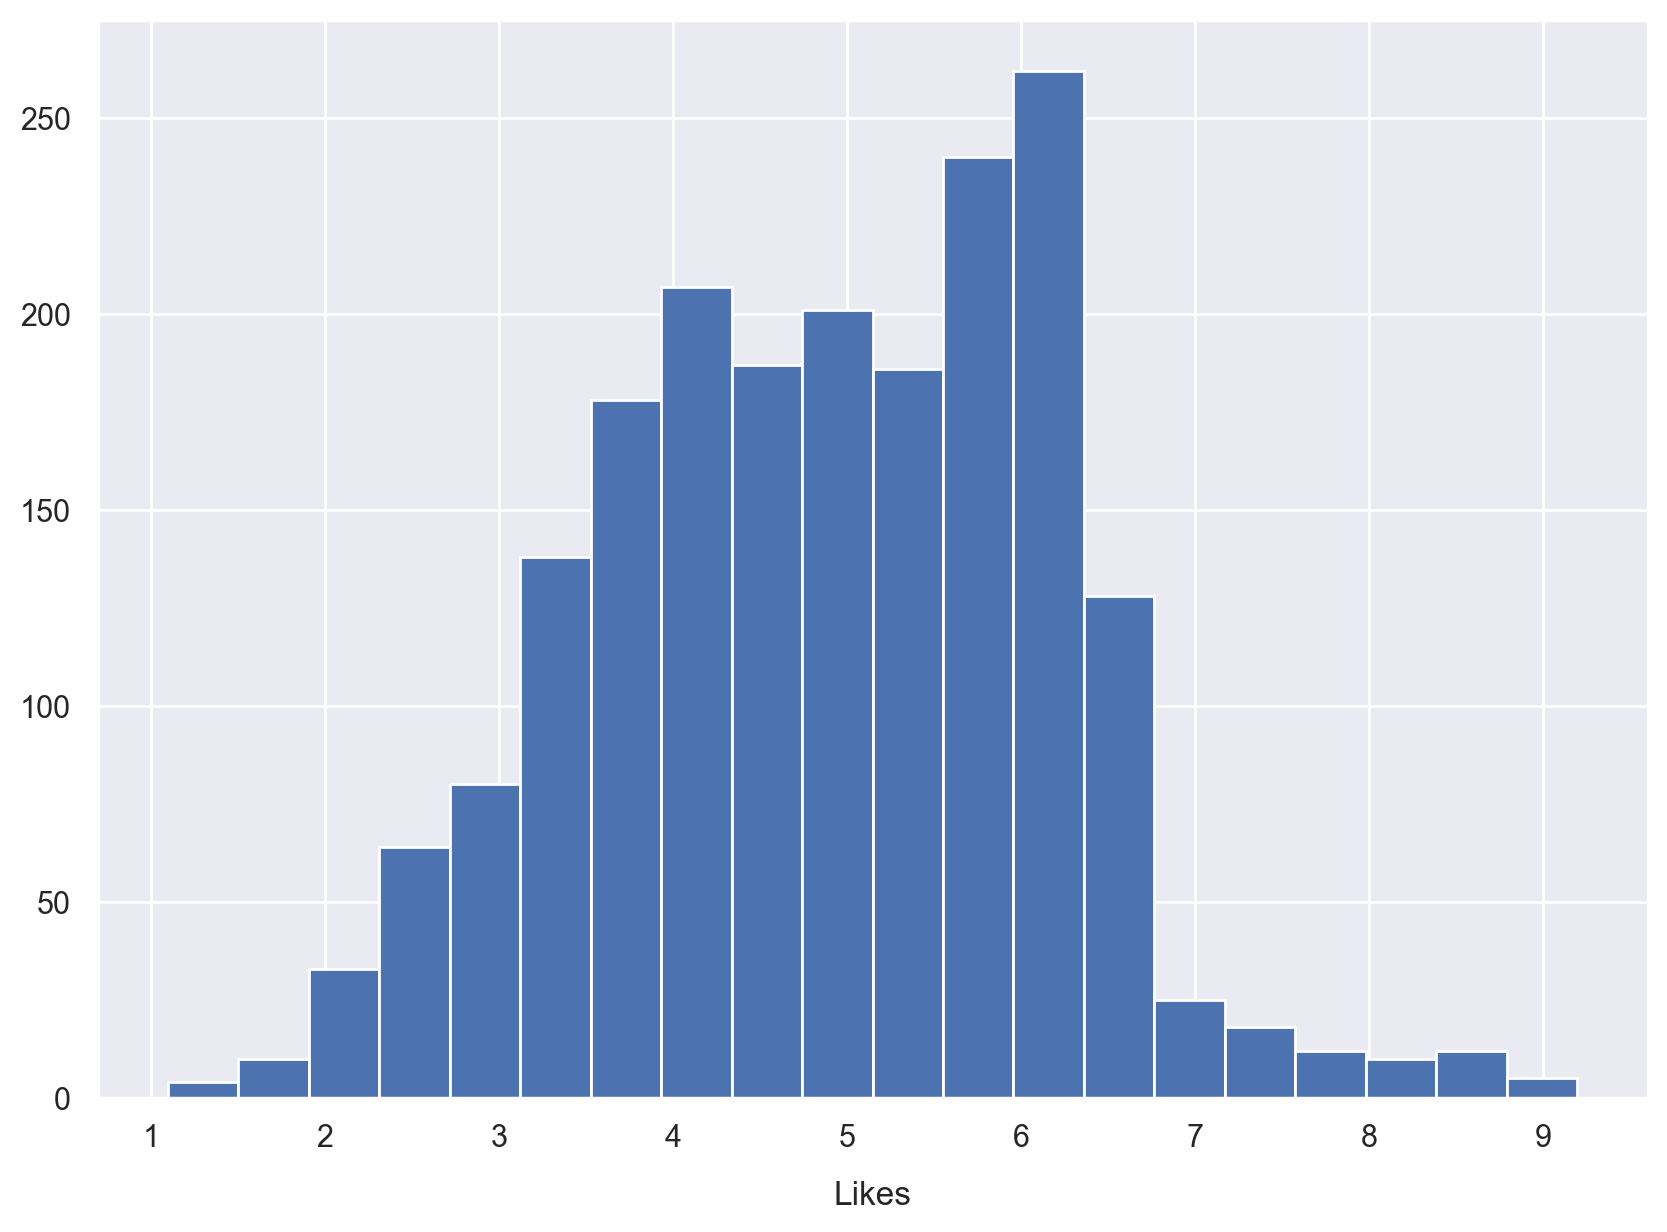

In [25]:
# rechecking distribution after applying log
fig = plt.figure()
num_bins = min((20, len(insta_df['Likes'].unique())))
insta_df['Likes'].hist(bins=num_bins)
plt.xlabel('Likes')

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [26]:
# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# print the sizes of our training and test set:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 4)
(400, 4)
(1600,)
(400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
lin_reg = LinearRegression()
fit = lin_reg.fit(X_train_scaled, y_train)

In [29]:
# writer your code here:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores_pipe_1 = cross_val_score(pipeline, X_train, y_train,cv=10)
print("Average 10-Fold CV R2 Score: {}".format((np.mean(scores_pipe_1)) ))
scores_pipe_2 = cross_val_score(pipeline, X_train, y_train,cv=10, scoring='neg_mean_squared_error') 
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores_pipe_2))))

Average 10-Fold CV R2 Score: 0.2537024335283243
Average 10-Fold CV MSE Score: 374088.1102253831


Average k=10 fold MSE score is 374088.110

    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [30]:
# write your code here:
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")  # ignore all caught warnings

  ridge = Ridge()
  #ridge.fit(X_train, y_train)
  param_grid = {'alpha': np.logspace(-3, -2, 1, 2, 3)}
  grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
  grid.fit(X_train,y_train)
  best_score = float(format(grid.best_score_, '.4f'))
  print('Best CV score for Ridge: {:.4f}'.format(-1*(grid.best_score_)))
  print('Best parameter(alpha) for Ridge :',grid.best_params_)

Best CV score for Ridge: 259.2156
Best parameter(alpha) for Ridge : {'alpha': np.float64(0.037037037037037035)}


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [31]:
# write your code here:
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")  # ignore all caught warnings
    
  lasso = Lasso()
  param_grid = {'alpha': np.logspace(-3, -2, 1, 2, 3)}
  grid_l = GridSearchCV(lasso, param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
  grid_l.fit(X_train,y_train)
  best_score_l = float(format(grid_l.best_score_, '.2f'))
  print('Best CV score for Lasso: {:.4f}'.format(-1*(grid_l.best_score_)))
  print('Best parameter (alpha) for Lasso:',grid_l.best_params_)

Best CV score for Lasso: 259.2134
Best parameter (alpha) for Lasso: {'alpha': np.float64(0.037037037037037035)}


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [32]:
# write your code here:
pipeline_huber = make_pipeline(StandardScaler(), HuberRegressor())
scores_huber = cross_val_score(pipeline_huber, X, y, scoring='neg_mean_absolute_error', cv=10)
print("Average 10-Fold CV MSE Score for Huber regression: {}".format(absolute((np.mean(scores_huber)) )))

Average 10-Fold CV MSE Score for Huber regression: 298.6138578408425


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [33]:
# write your code here:
pipeline_ransac = make_pipeline(StandardScaler(),RANSACRegressor())
scores_RANSAC = cross_val_score(pipeline_ransac, X, y, scoring='neg_mean_absolute_error', cv=10)
print("Average 10-Fold CV MSE Score for RANSAC regression: {}".format(absolute((np.mean(scores_RANSAC )) )))

Average 10-Fold CV MSE Score for RANSAC regression: 263.3929089283365


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:
##### Observation:
The RANSAC regression model performed better on average. This is because it has a lower average 10-fold cross-validation Mean Squared Error (MSE) score 257.598 compared to the Huber regression model 298.614.
In cross-validation, the model with the lower MSE generally indicates better predictive performance.


    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [34]:
# write your code here:
best_model = RANSACRegressor()
best_model.fit(X_train_scaled, y_train)


RANSACRegressor()

    24- Predict the number of likes for test data and compute the MSE (5 points)

In [35]:
# write your code here:
from sklearn.metrics import mean_squared_error
y_train_pred = best_model.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE for best model RANSAC: {train_mse}")


Training MSE for best model RANSAC: 432553.6533843617


##### Observation:
As per analysis, in a training MSE is 602446.97 for the best performing RANSAC model, which tells the factors influencing predictive accuracy.
- In general, Regression algorithms are well-suited to this task because the number of likes is a continuous numerical variable and we are trying to predict a quantity, not a category.  Specifically, robust regression methods like RANSAC proved more effective than standard linear regression. This is likely due to the presence of outliers in the data.
- RANSAC by iteratively identifying and excluding outliers during model fitting, produces a regression model that is more representative of the typical relationship between likes and other features.
- While linear regression with shrinkage methods (like Ridge or Lasso) can also improve upon the baseline by mitigating the impact of multicollinearity and overfitting, they do not outperform RANSAC.

##### Summary of Linear Regression & cross-validation
- Linear regression is a fundamental statistical method used to model the linear relationship between a dependent variable (number of likes) and one or more independent variables (e.g., Days passed from post, Number of tags, Number of comments).  The goal is to find the line of best fit that minimizes the sum of the squared differences between the observed values and the values predicted by the line.
- Cross-validation is a technique used to evaluate the performance of a machine learning model and assess its ability to generalize to unseen data.  It involves partitioning the available data into multiple subsets like a training set used to train the model and a validation set (or test set) used to evaluate its performance.
- k-fold Cross-Validation: A common approach is k-fold cross-validation, where the data is divided into k equal-sized folds. The model is trained k times, each time using k-1 folds as the training set and the remaining fold as the validation set. The performance is then averaged across all k folds to obtain a more robust estimate of the model's generalization performance.
- Benefits of cross-validation are Reduces overfitting, model selection.

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---